# STEP 1: Load and Display Basic Information

In [40]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [41]:
# Load dataset
pd.options.display.max_columns = None
df = pd.read_csv('/Users/mady/Library/Mobile Documents/com~apple~CloudDocs/DS project/readmission-prediction/data/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [42]:
# Display basic information about the dataset
df.info()

# Display summary statistics of the dataset
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766,101766.000000,5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,18,73,NaN,NaN,NaN,NaN,NaN,NaN,717,749,790,NaN,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,40256,49949,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2: Data Cleaning

### 2.1 Understand the unique values in each column

In [43]:
# Display unique values in each object column
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values[:10]}")  # Displaying first 10 unique values for brevity
    print(f"Number of Unique Values: {len(unique_values)}")
    print()
    
# Dropping examide and citoglipton columns as they have only one unique value
df.drop(['examide', 'citoglipton'], axis=1, inplace=True)    

# Remove ? values from the dataset
df.replace('?', np.nan, inplace=True)

Column: race
Unique Values: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Number of Unique Values: 6

Column: gender
Unique Values: ['Female' 'Male' 'Unknown/Invalid']
Number of Unique Values: 3

Column: age
Unique Values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Number of Unique Values: 10

Column: weight
Unique Values: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
Number of Unique Values: 10

Column: payer_code
Unique Values: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM']
Number of Unique Values: 18

Column: medical_specialty
Unique Values: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology']
Number of Unique Values: 73

Column: diag_1
Unique Values: ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7'

### 2.2 Missing values

In [44]:
# Display & of missing values in each column as percentage
missing_values = df.isnull().sum() / len(df) * 100
missing_values


# Drop columns with more than 50% missing values?

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

### 2.3 Define Category Columns

In [45]:
# Convert columns to 'category' dtype
categorical_cols = [
    'race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult', 'payer_code', 
    'medical_specialty', 'readmitted', 'change', 'diabetesMed'
]

# Create hierarchy for the 'category' dtype
age_hierarchy = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
weight_hierarchy = ['[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '>200']
max_glu_serum_hierarchy = ['None', 'Norm', '>200', '>300']
A1Cresult_hierarchy = ['None', '>7', '>8', 'Norm']

# Create a dictionary to store the hierarchy for each column
hierarchy_dict = {
    'age': age_hierarchy,
    'weight': weight_hierarchy,
    'max_glu_serum': max_glu_serum_hierarchy,
    'A1Cresult': A1Cresult_hierarchy
}

# Convert columns to 'category' dtype with hierarchy
for col in categorical_cols:
    if col in hierarchy_dict:
        df[col] = pd.Categorical(df[col], categories=hierarchy_dict[col], ordered=True)
    else:
        df[col] = df[col].astype('category')
        

In [46]:
# Category for medication columns

medication_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'insulin', 'glyburide-metformin', 'glipizide-metformin', 
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]

for col in medication_cols:
    df[col] = df[col].astype('category')
   

In [47]:
# Mapping of ICD-9 codes to categories
icd9_to_category = {
    'Circulatory': [str(i) for i in range(390, 460)] + ['785'],
    'Respiratory': [str(i) for i in range(460, 520)] + ['786'],
    'Digestive': [str(i) for i in range(520, 580)] + ['787'],
    'Diabetes': ['250'],
    'Injury': [str(i) for i in range(800, 1000)],
    'Musculoskeletal': [str(i) for i in range(710, 740)],
    'Genitourinary': [str(i) for i in range(580, 630)] + ['788'],
    'Neoplasms': [str(i) for i in range(140, 240)],
    'Other': ['780', '781', '784'] + [str(i) for i in range(790, 800)],
    'Endocrine': [str(i) for i in range(240, 280) if i != 250],
    'Skin': [str(i) for i in range(680, 710)] + ['782'],
    'Infectious': [str(i) for i in range(1, 140)],
    'Mental': [str(i) for i in range(290, 320)],
    'External': ['E'] + ['V'],
    'Blood': [str(i) for i in range(280, 290)],
    'Nervous': [str(i) for i in range(320, 360)],
    'Pregnancy': [str(i) for i in range(630, 680)],
    'Sense': [str(i) for i in range(360, 390)],
    'Congenital': [str(i) for i in range(740, 760)]
}


In [48]:

# Function to map ICD-9 code to category
def map_icd9_to_category(icd9_code):
    if pd.isna(icd9_code):
        return 'Unknown'
    for category, codes in icd9_to_category.items():
        if any(icd9_code.startswith(code) for code in codes):
            return category
    return 'Unknown'


In [49]:
# Apply mapping to diagnosis columns
df['diag_1_category'] = df['diag_1'].apply(map_icd9_to_category)
df['diag_2_category'] = df['diag_2'].apply(map_icd9_to_category)
df['diag_3_category'] = df['diag_3'].apply(map_icd9_to_category)

### 2.4 Convert Binary to Numeric Columns 

In [50]:
# Convert binary columns to numeric
binary_cols = ['change', 'diabetesMed']

label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [51]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_category,diag_2_category,diag_3_category
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,0,NO,Diabetes,Unknown,Unknown
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,0,1,>30,Endocrine,Diabetes,Endocrine
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,1,NO,Infectious,Diabetes,External
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,0,1,NO,Infectious,Diabetes,Circulatory
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,0,1,NO,Neoplasms,Neoplasms,Diabetes


# Step 3: EDA

### 3.1 Categorical Data   

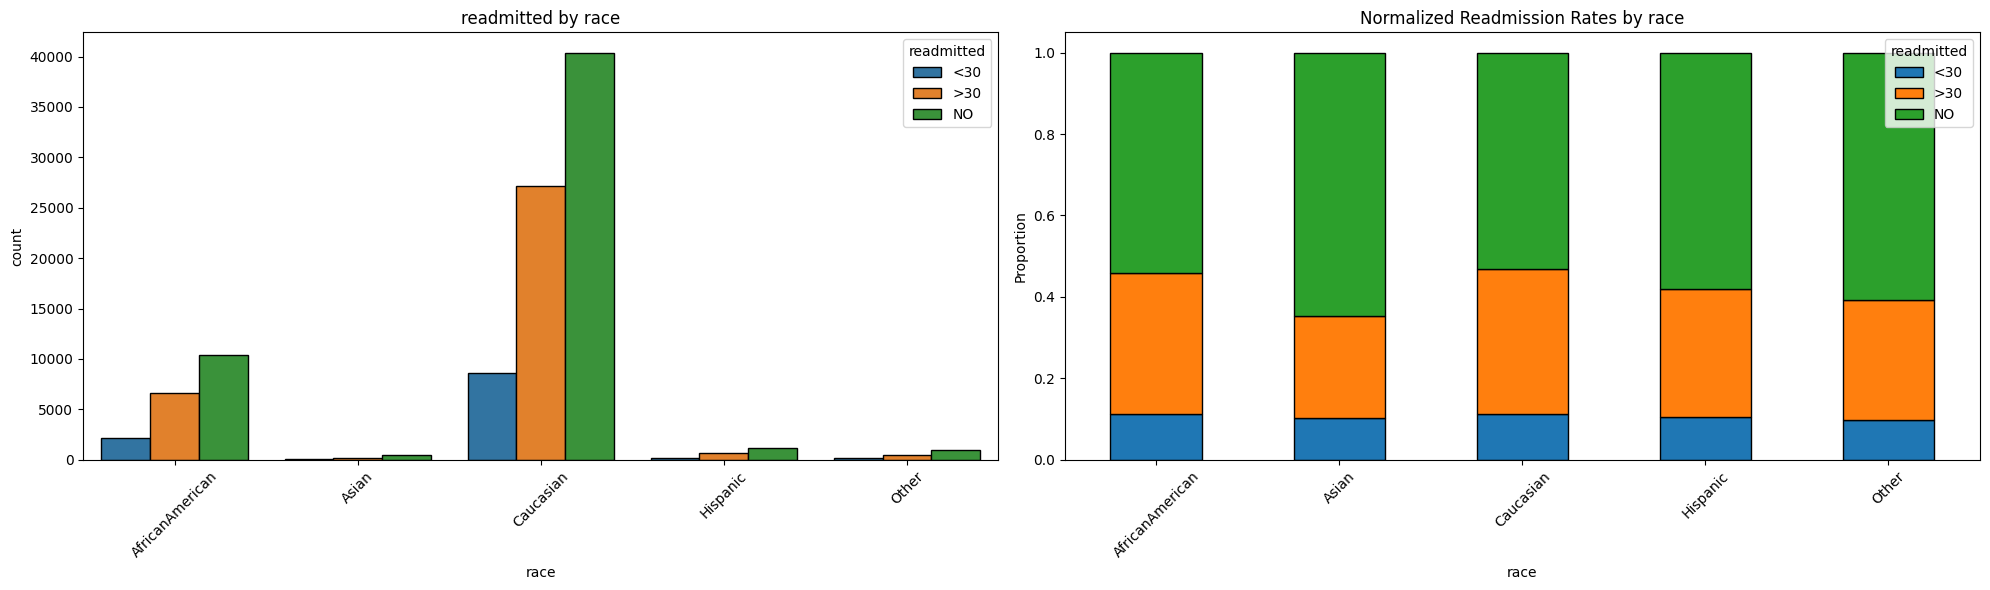

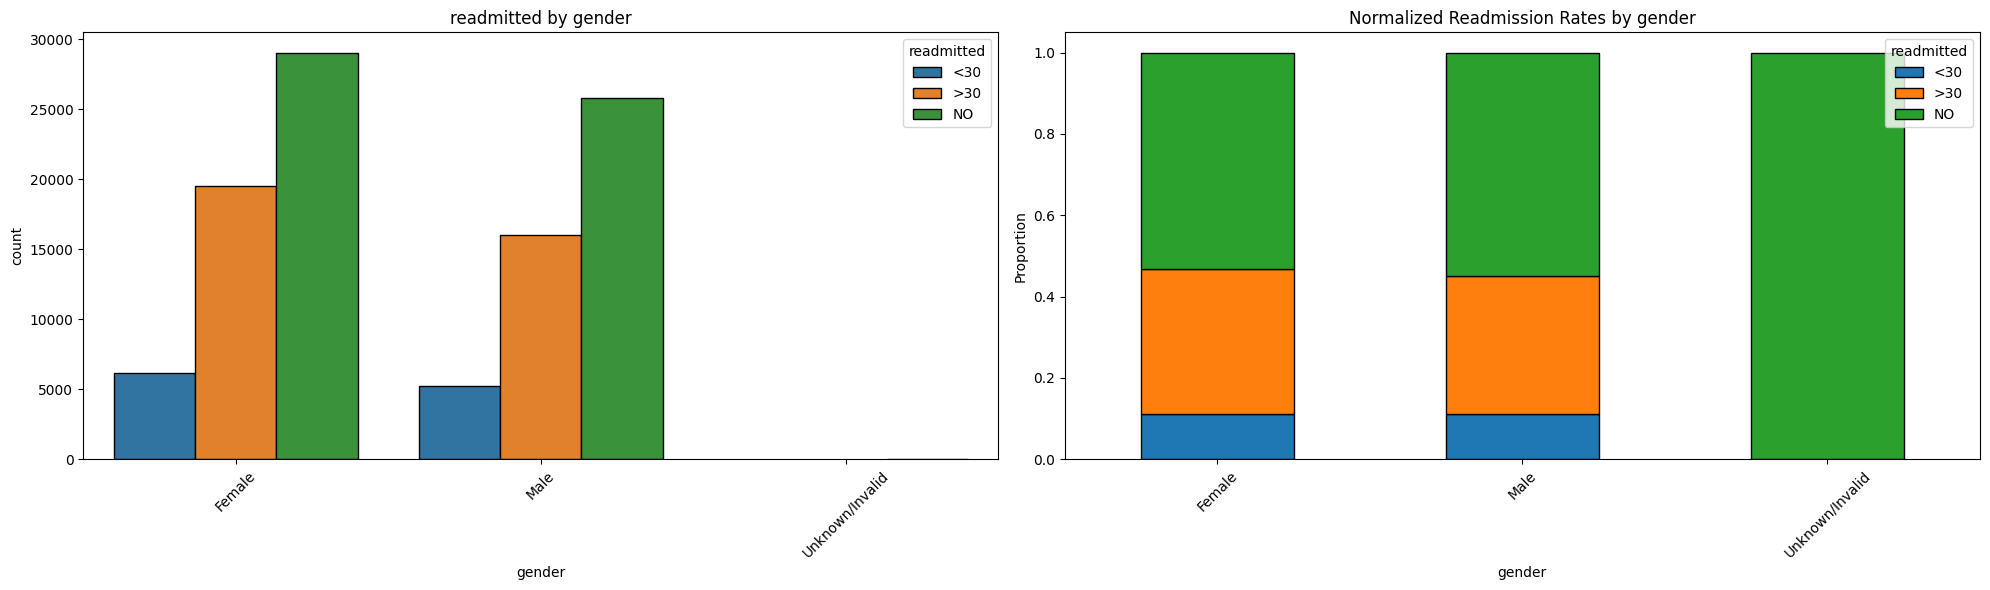

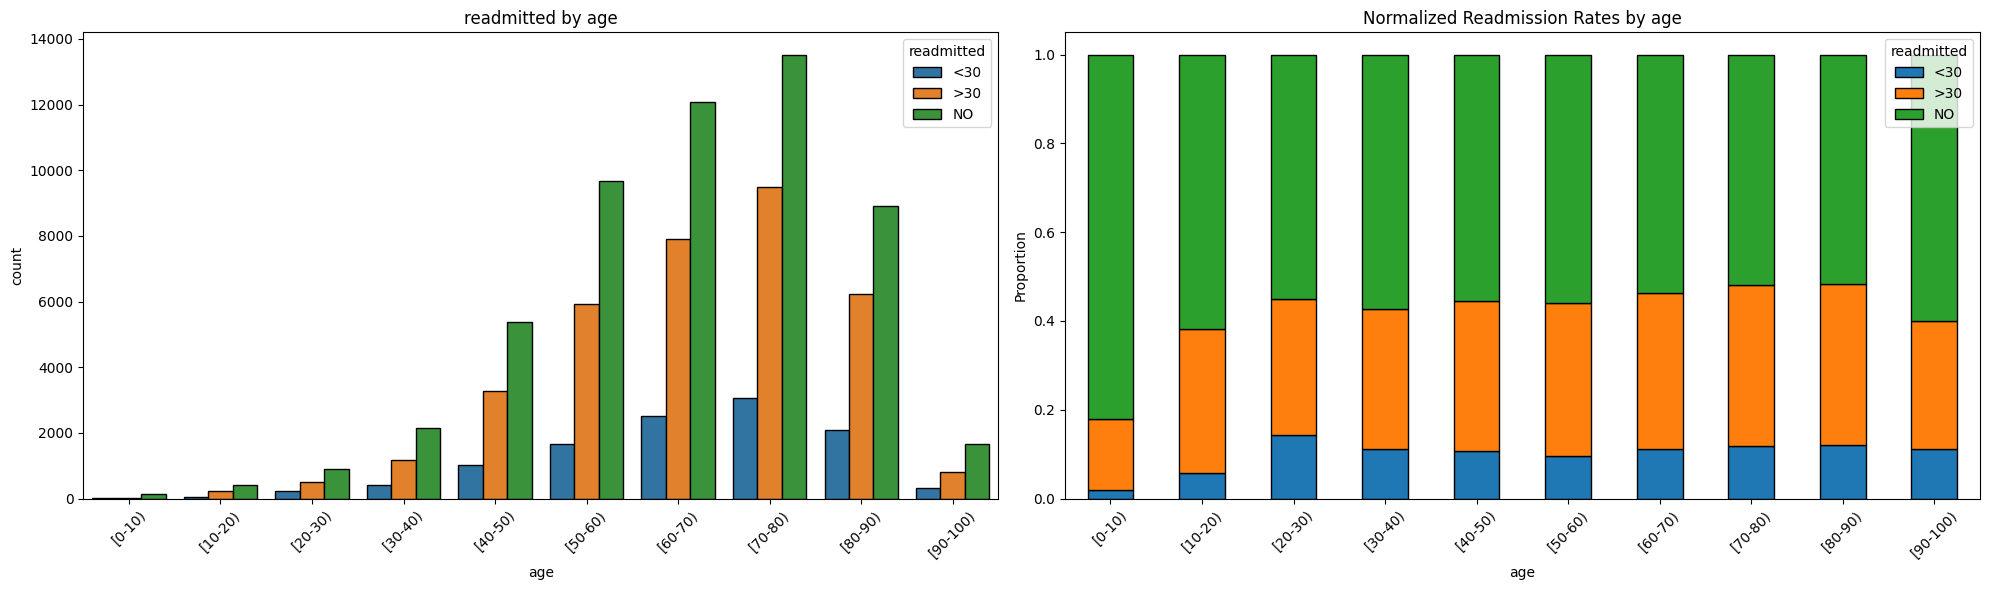

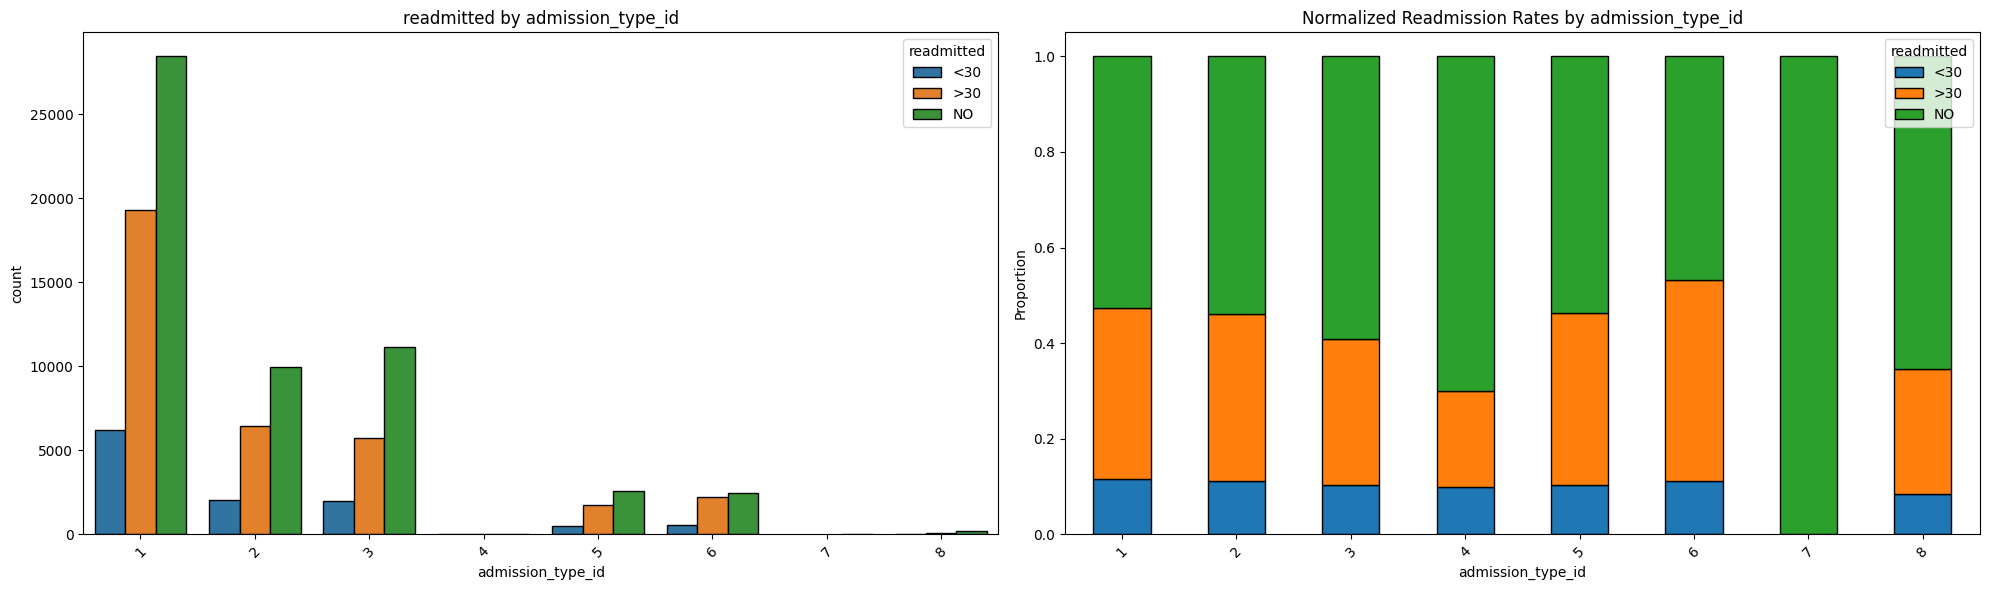

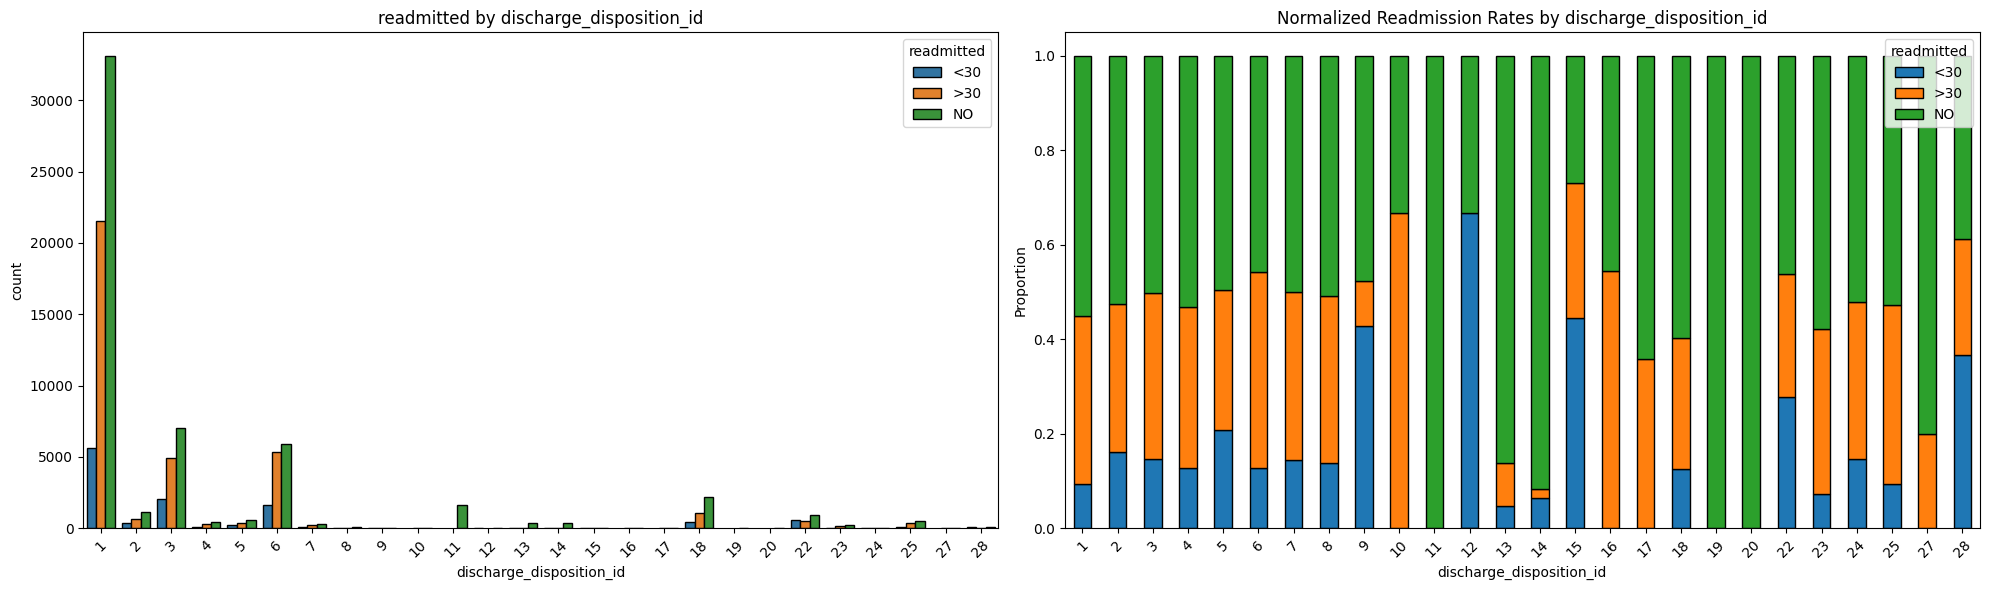

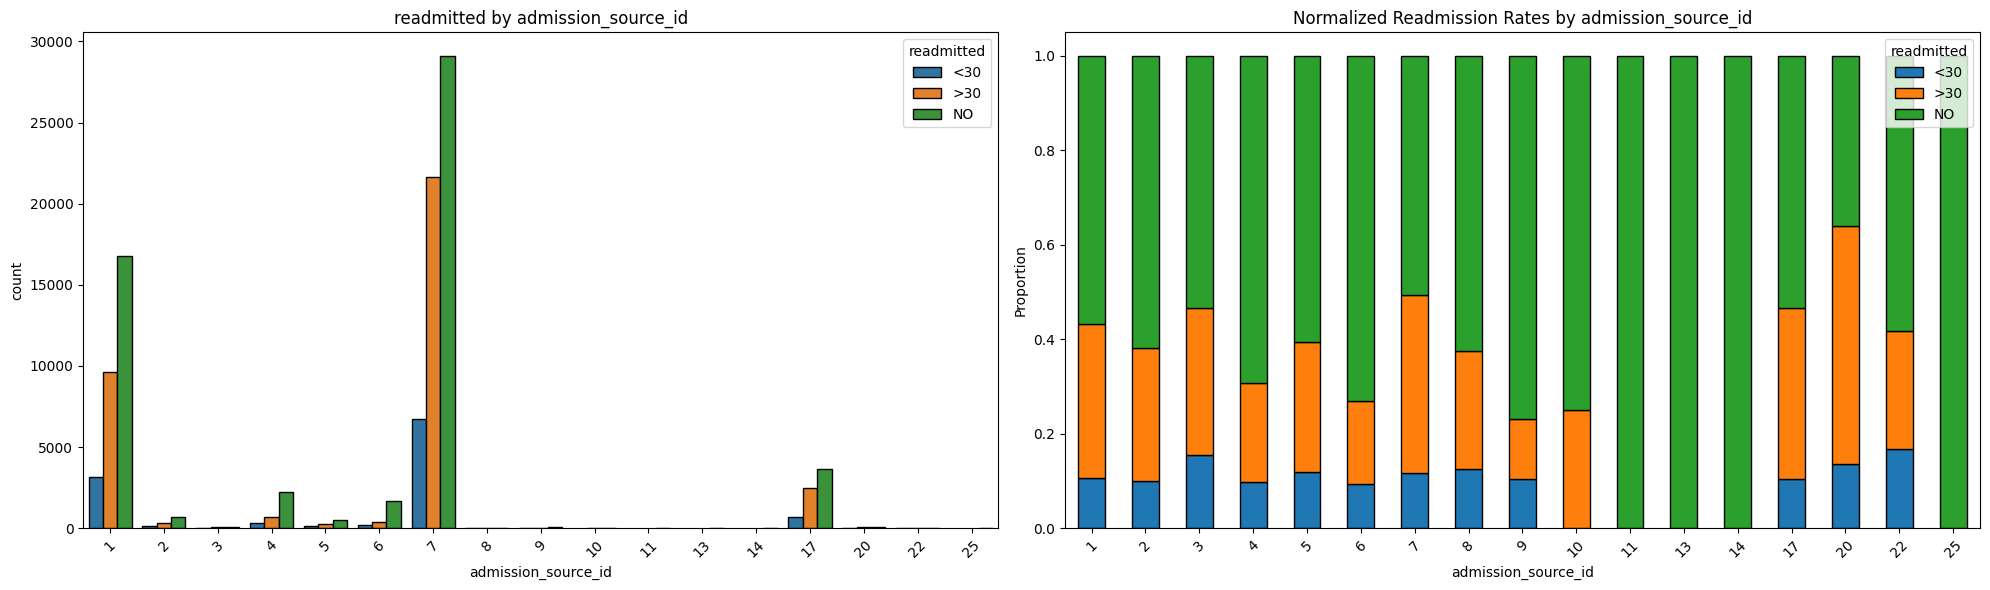

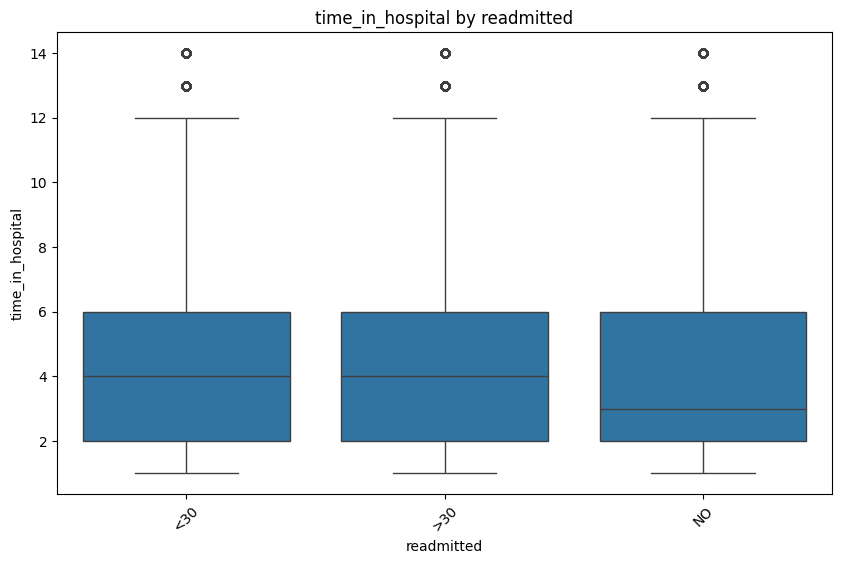

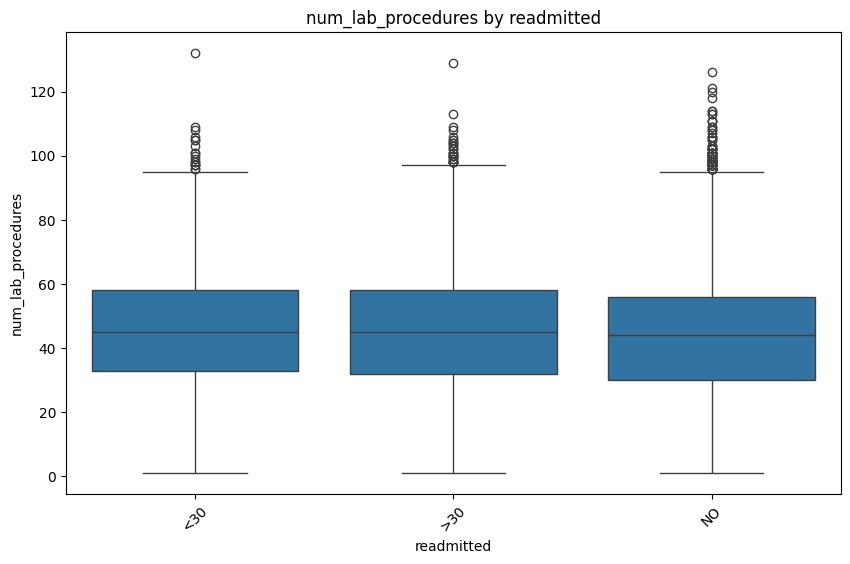

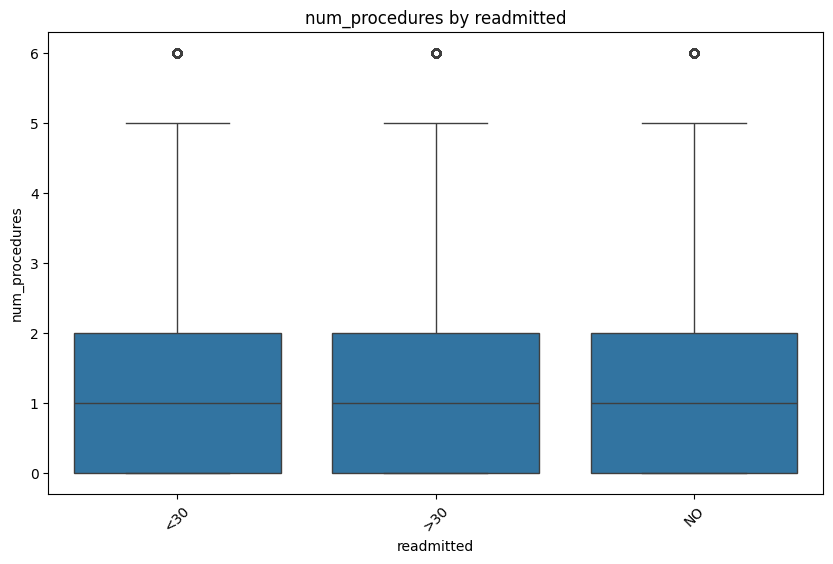

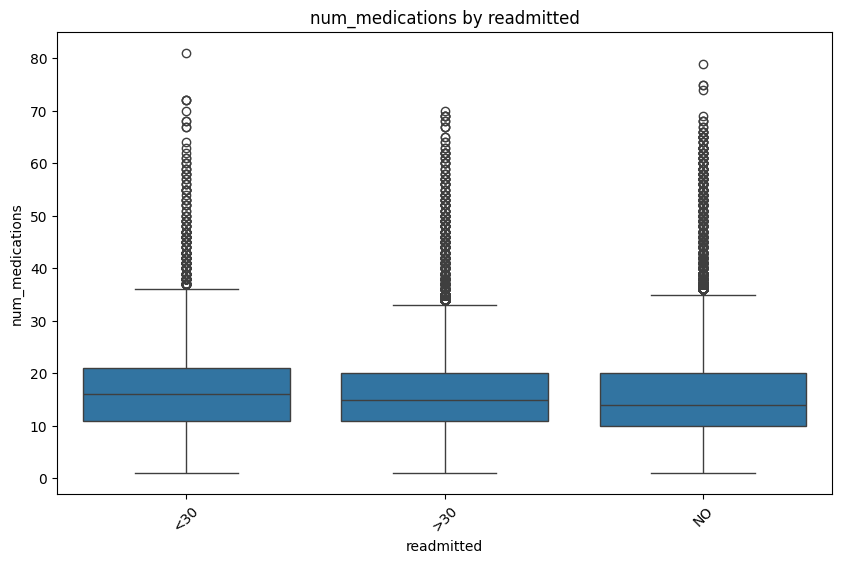

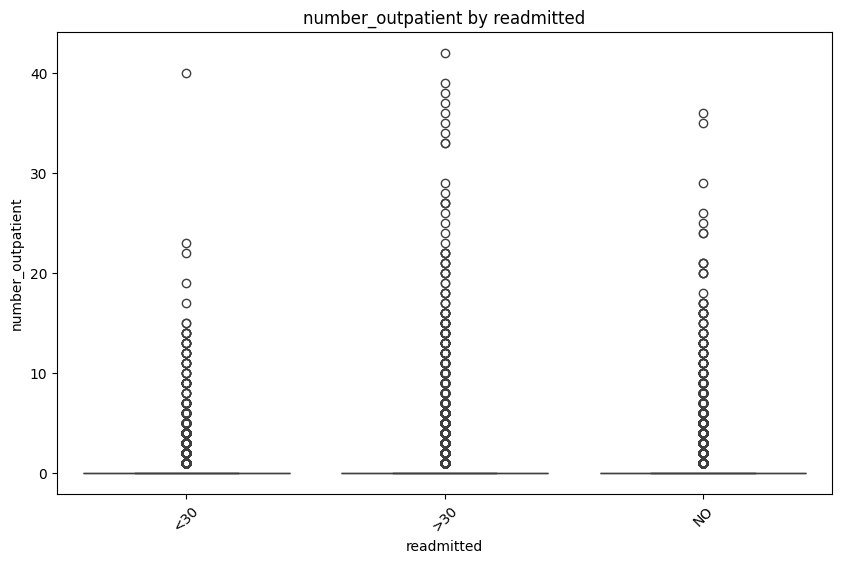

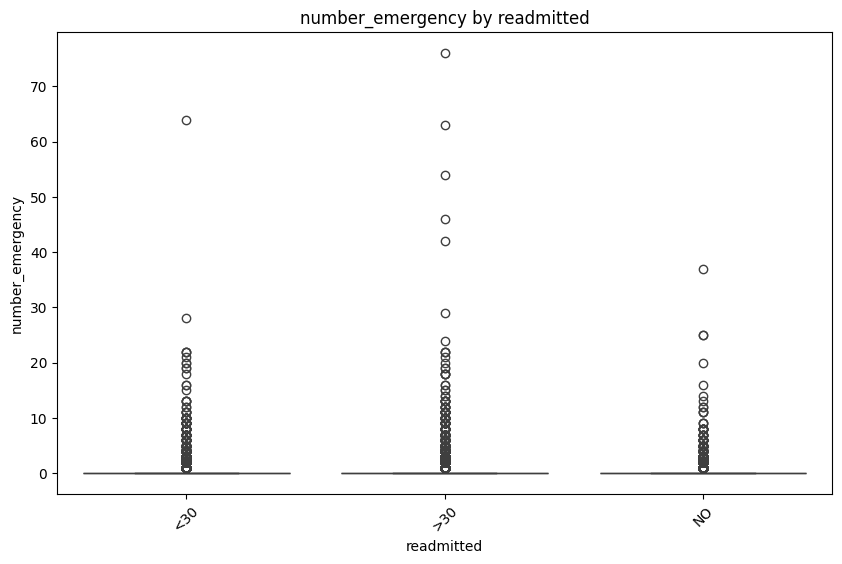

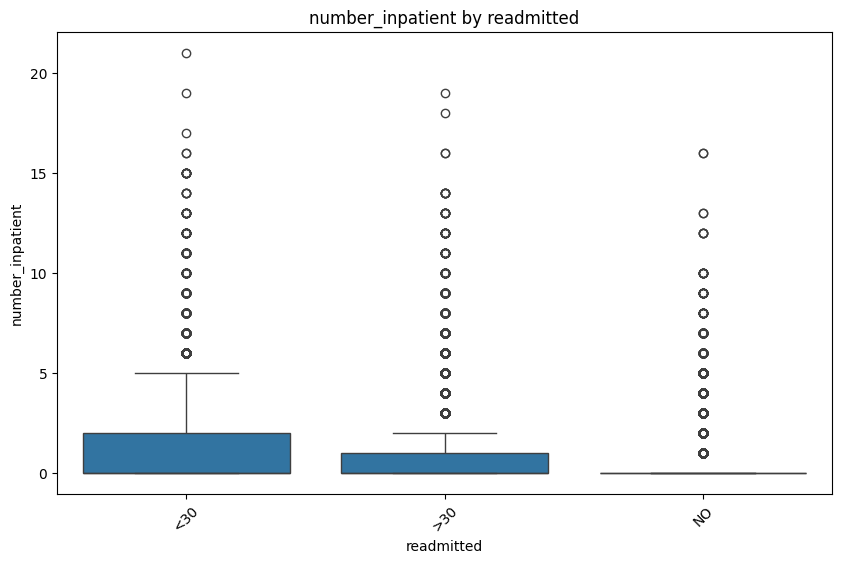

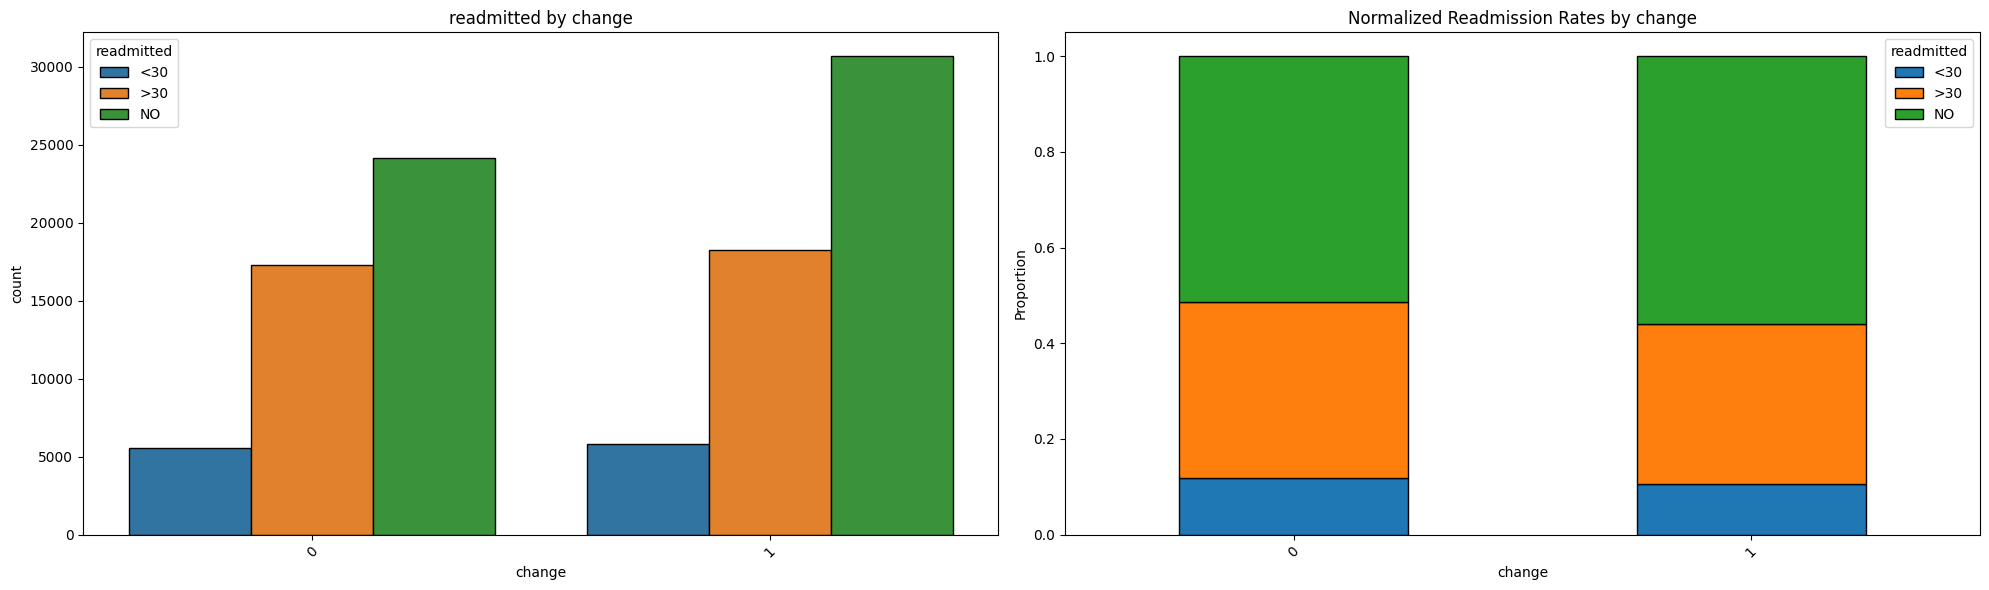

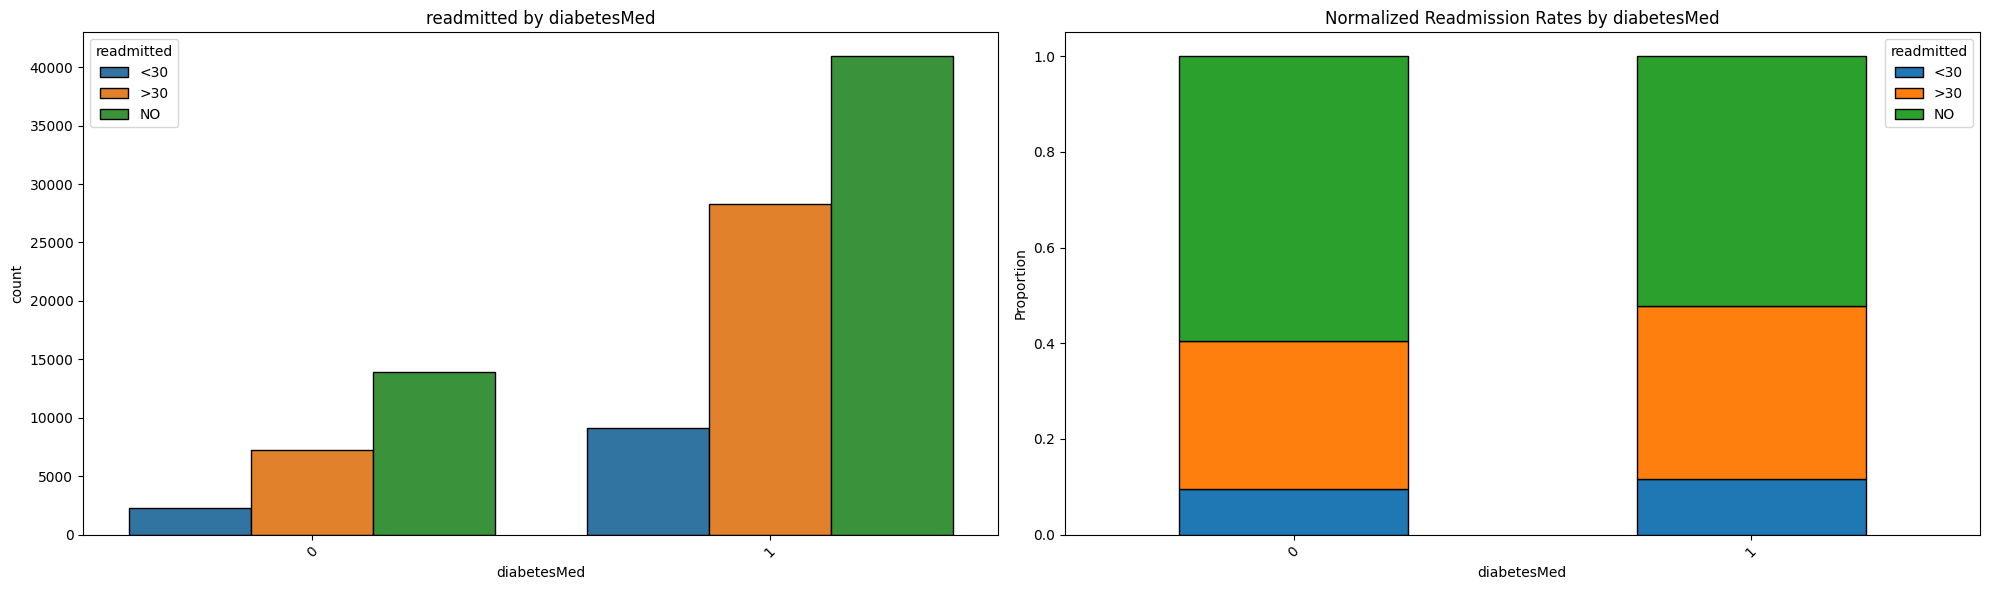

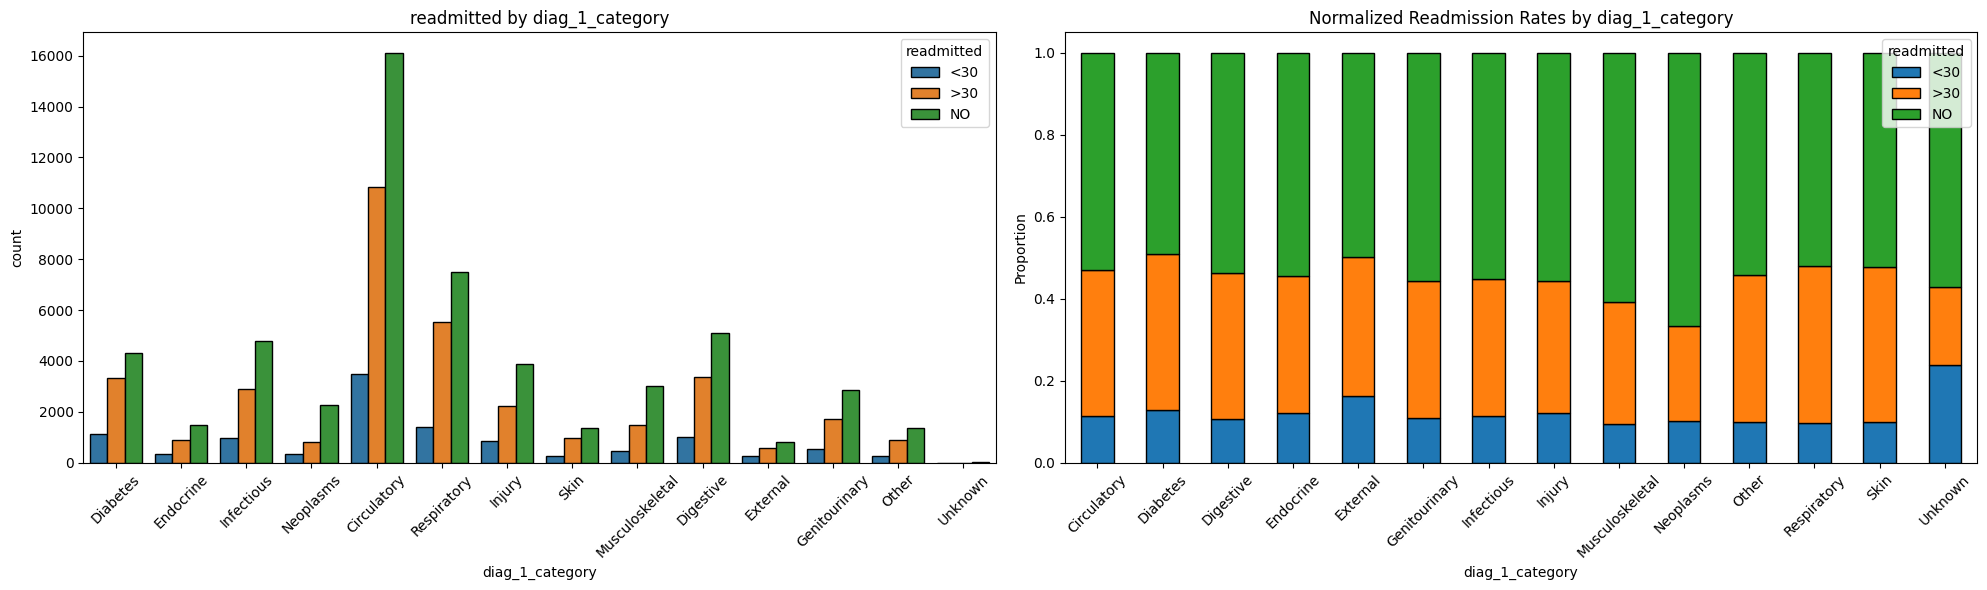

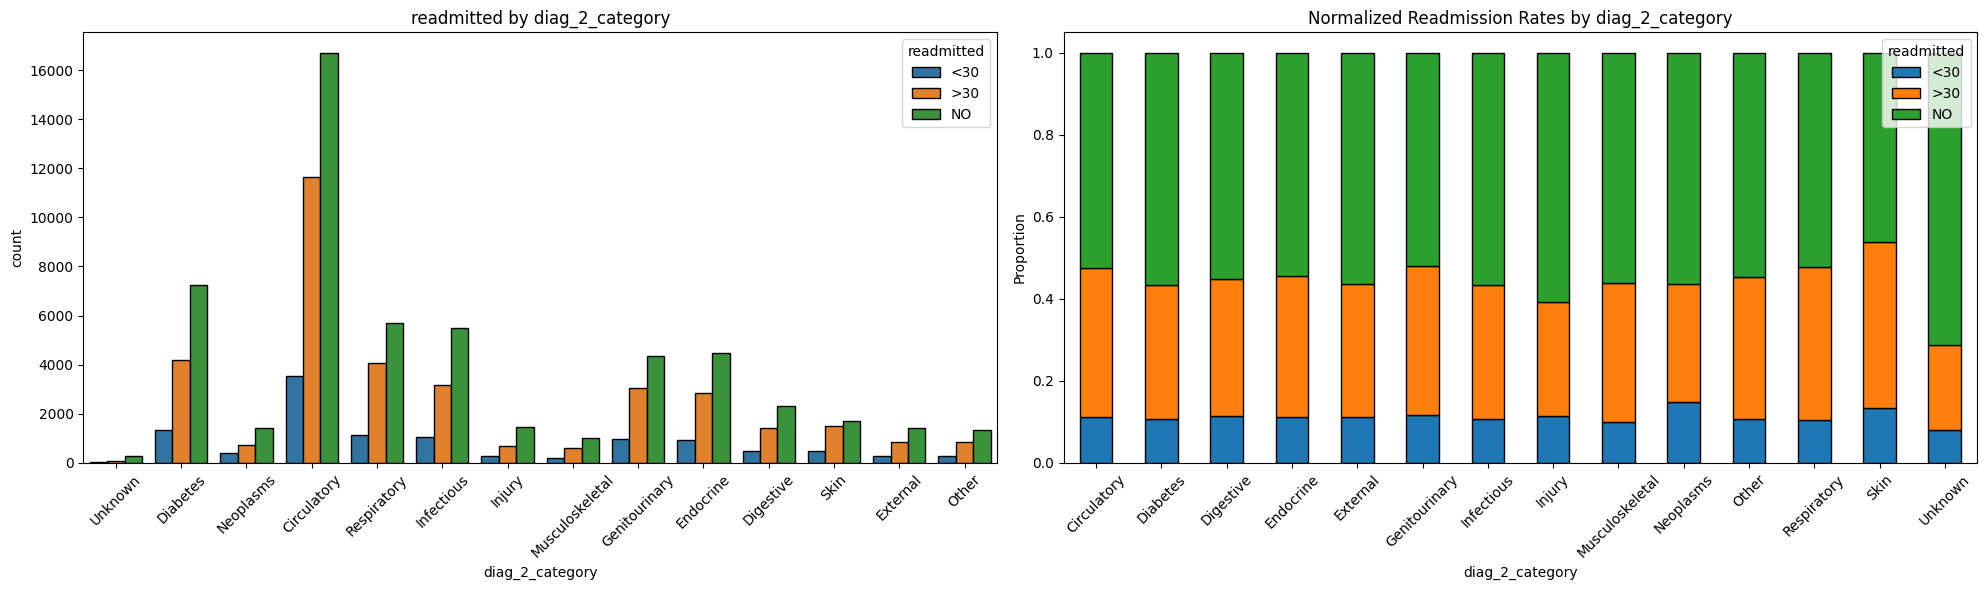

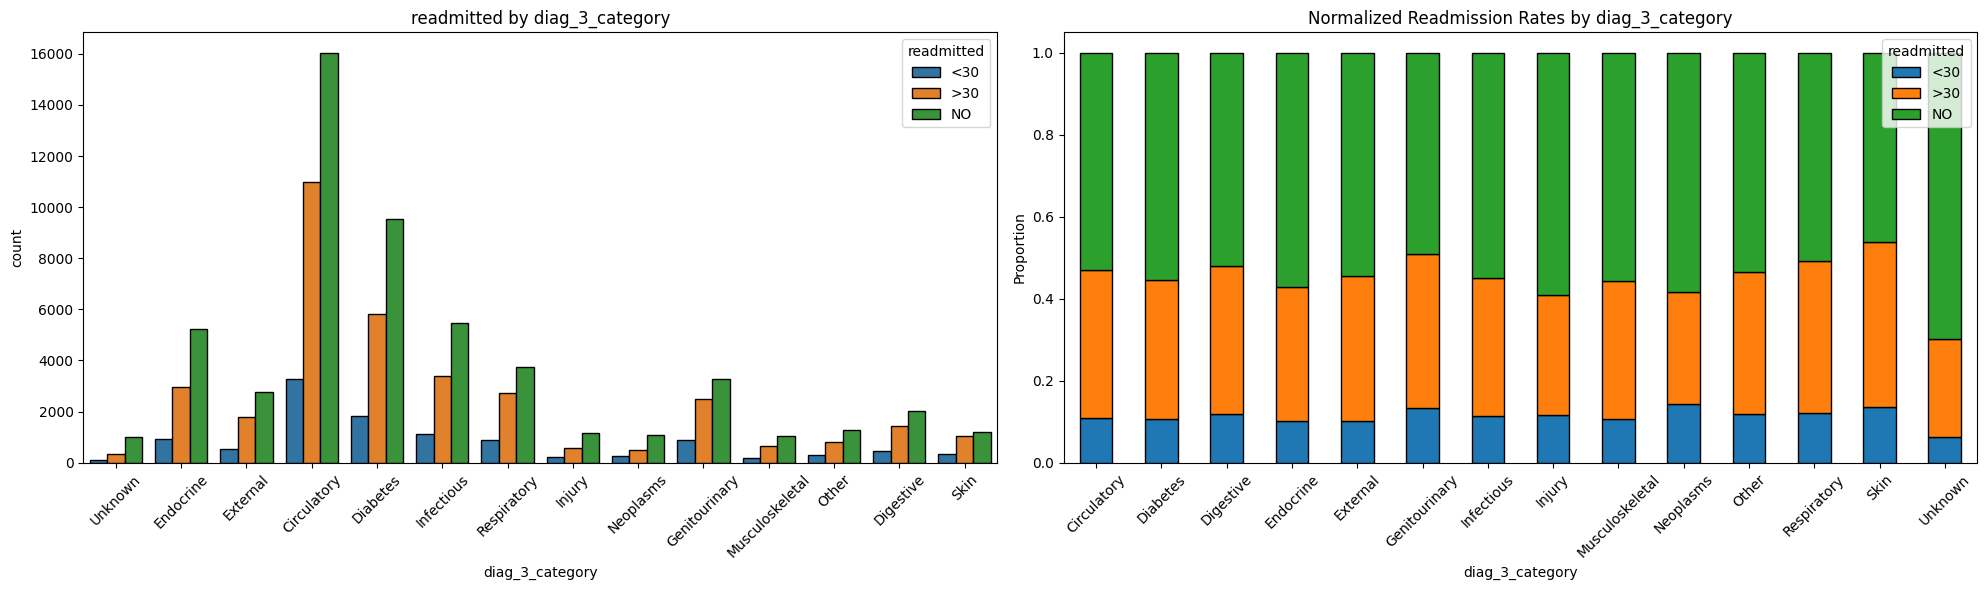

In [52]:
## Exploring relationships between readmission and features

# Function to plot count plots
def plot_countplot(ax, df, col, hue):
    sns.countplot(x=col, hue=hue, data=df, edgecolor='black', ax=ax)
    ax.set_title(f'{hue} by {col}')
    ax.tick_params(axis='x', rotation=45)
    
    
# Function to normalize data for readmission rates
def normalize_data(df, group_col):
    normalized_df = df.groupby([group_col, 'readmitted'], observed=False).size().unstack().fillna(0)
    normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    return normalized_df

# Function to plot normalized readmission rates
def plot_normalized_readmission(ax, normalized_df, group_col):
    normalized_df.plot(kind='bar', stacked=True, edgecolor='black', ax=ax)
    ax.set_title(f'Normalized Readmission Rates by {group_col}')
    ax.set_ylabel('Proportion')
    ax.tick_params(axis='x', rotation=45)


# Function to display count and normalized plots side by side
def display_plots_side_by_side(df, cols, plot_func):
    for col in cols:
        fig, axs = plt.subplots(1, 2, figsize=(20, 6))
        
        plot_func(axs[0], df, col, outcome_col)
        
        normalized_df = normalize_data(df, col)
        plot_normalized_readmission(axs[1], normalized_df, col)
        
        plt.tight_layout()
        plt.show()
    
# Define the outcome column
outcome_col = 'readmitted'

# Outcome vs. Patient Demographics
demographic_cols = ['race', 'gender', 'age']
display_plots_side_by_side(df, demographic_cols, plot_countplot)

# Outcome vs. Admission and Discharge Details
admission_discharge_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
display_plots_side_by_side(df, admission_discharge_cols, plot_countplot)

# Outcome vs. Hospital Stay Details
stay_details_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']
for col in stay_details_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=outcome_col, y=col, data=df)
    plt.title(f'{col} by {outcome_col}')
    plt.xticks(rotation=45)
    plt.show()
    

# Hospital history features vs. outcome
history_cols = ['number_outpatient', 'number_emergency', 'number_inpatient']
for col in history_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=outcome_col, y=col, data=df)
    plt.title(f'{col} by {outcome_col}')
    plt.xticks(rotation=45)
    plt.show()

# Outcome vs. Change and DiabetesMed
binary_cols = ['change', 'diabetesMed']
display_plots_side_by_side(df, binary_cols, plot_countplot)

# Outcome vs. diagnosis categories
diagnosis_cols = ['diag_1_category', 'diag_2_category', 'diag_3_category']
display_plots_side_by_side(df, diagnosis_cols, plot_countplot)

How to deal with outliers?

### 3.2 Numerical Data
#### 3.2.1 Make Histogram Overview 

array([[<Axes: title={'center': 'encounter_id'}>,
        <Axes: title={'center': 'patient_nbr'}>,
        <Axes: title={'center': 'admission_type_id'}>,
        <Axes: title={'center': 'discharge_disposition_id'}>],
       [<Axes: title={'center': 'admission_source_id'}>,
        <Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>],
       [<Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>,
        <Axes: title={'center': 'number_inpatient'}>],
       [<Axes: title={'center': 'number_diagnoses'}>,
        <Axes: title={'center': 'change'}>,
        <Axes: title={'center': 'diabetesMed'}>, <Axes: >]], dtype=object)

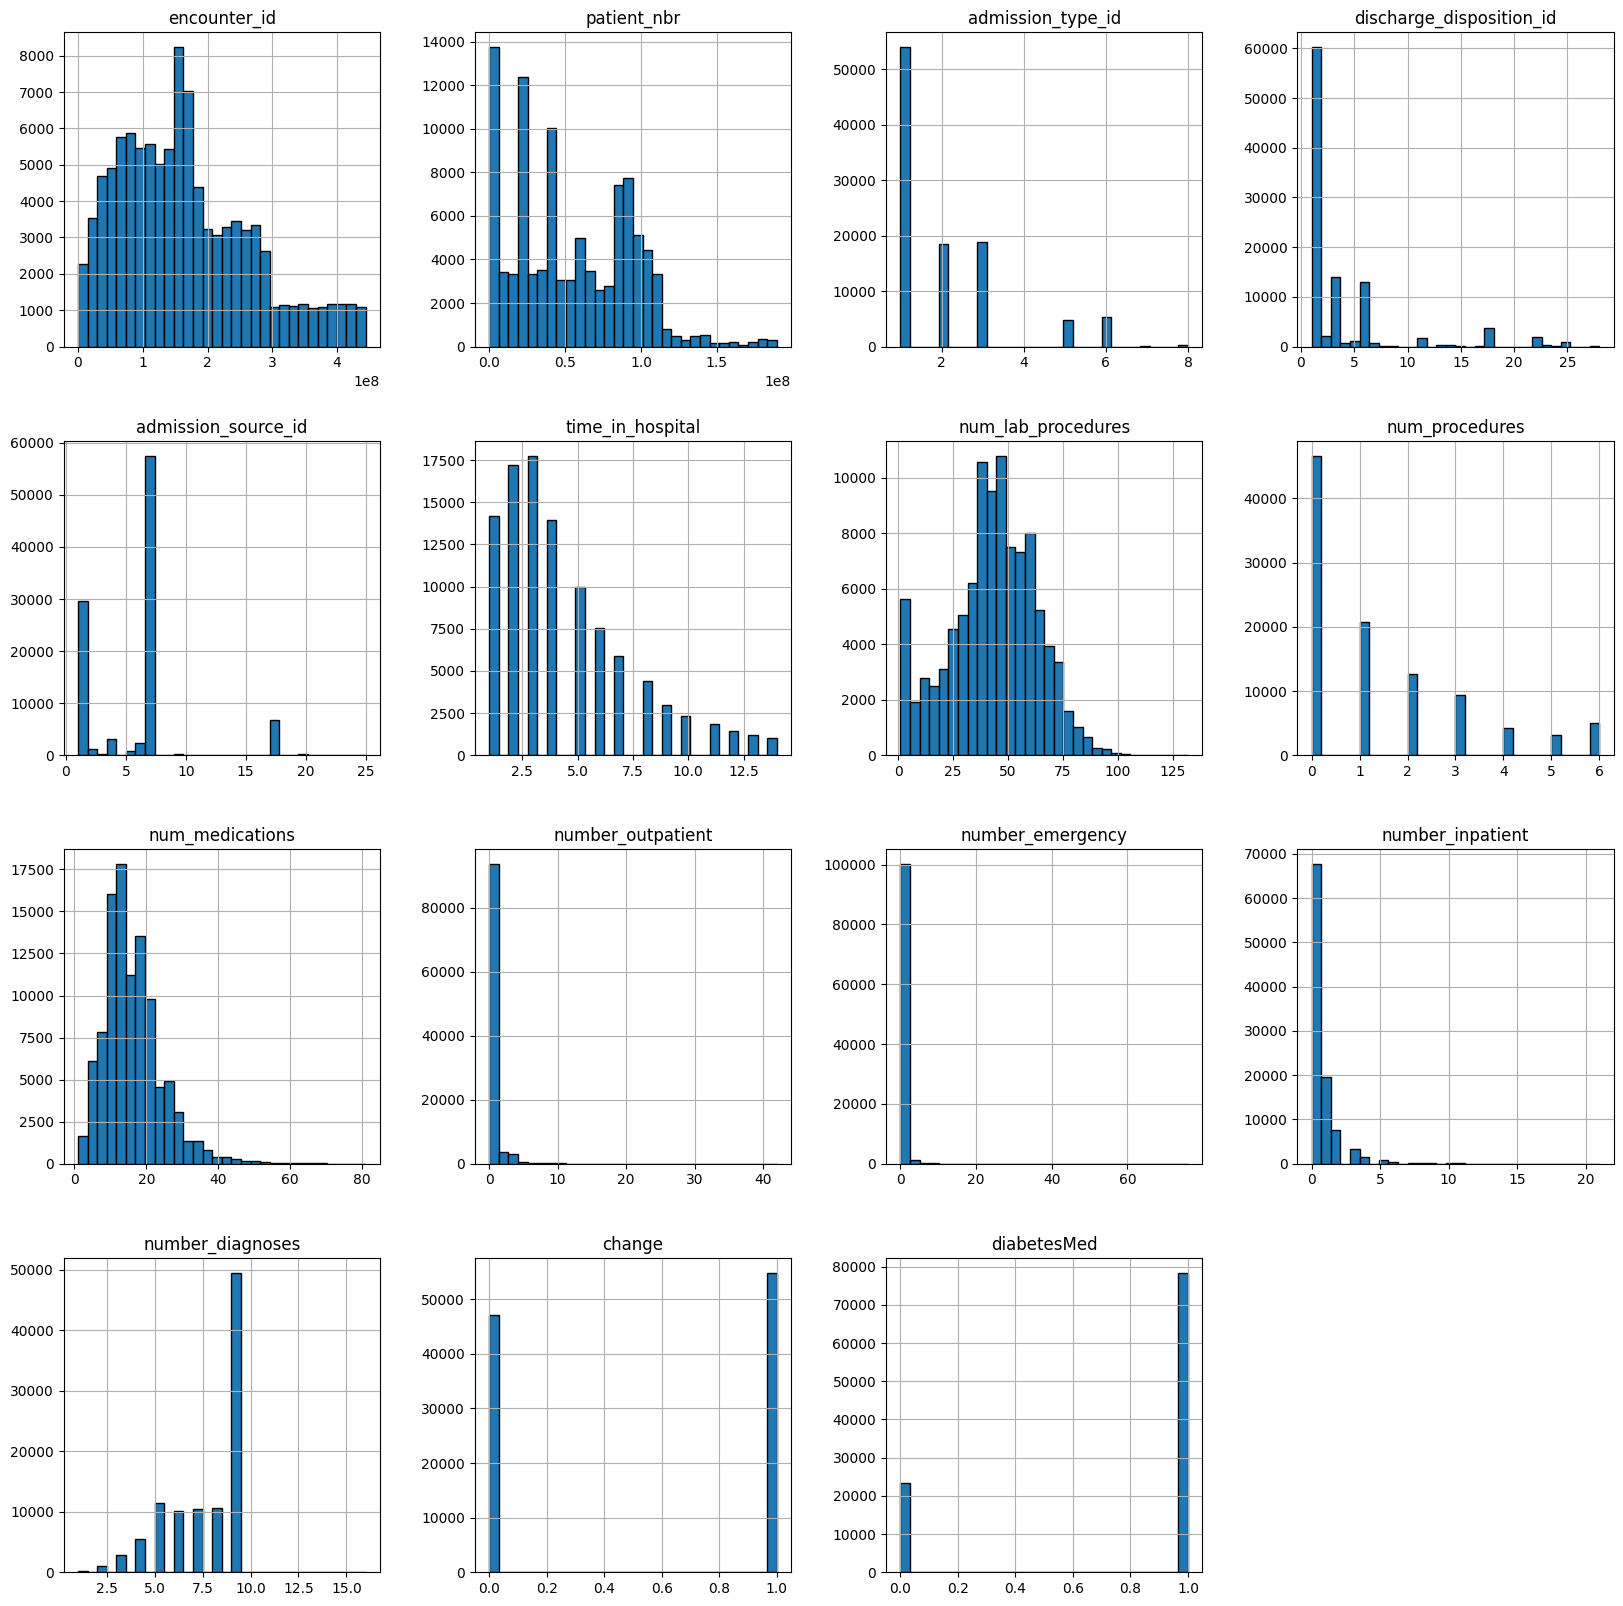

In [126]:
#display histograms for all columns
df.hist(figsize=(20, 20), bins=30, edgecolor='black')

# Do I need to make the skewed data normal? By logaritmic transformation?

#### 3.2.2 Pairplot for all numerical variables

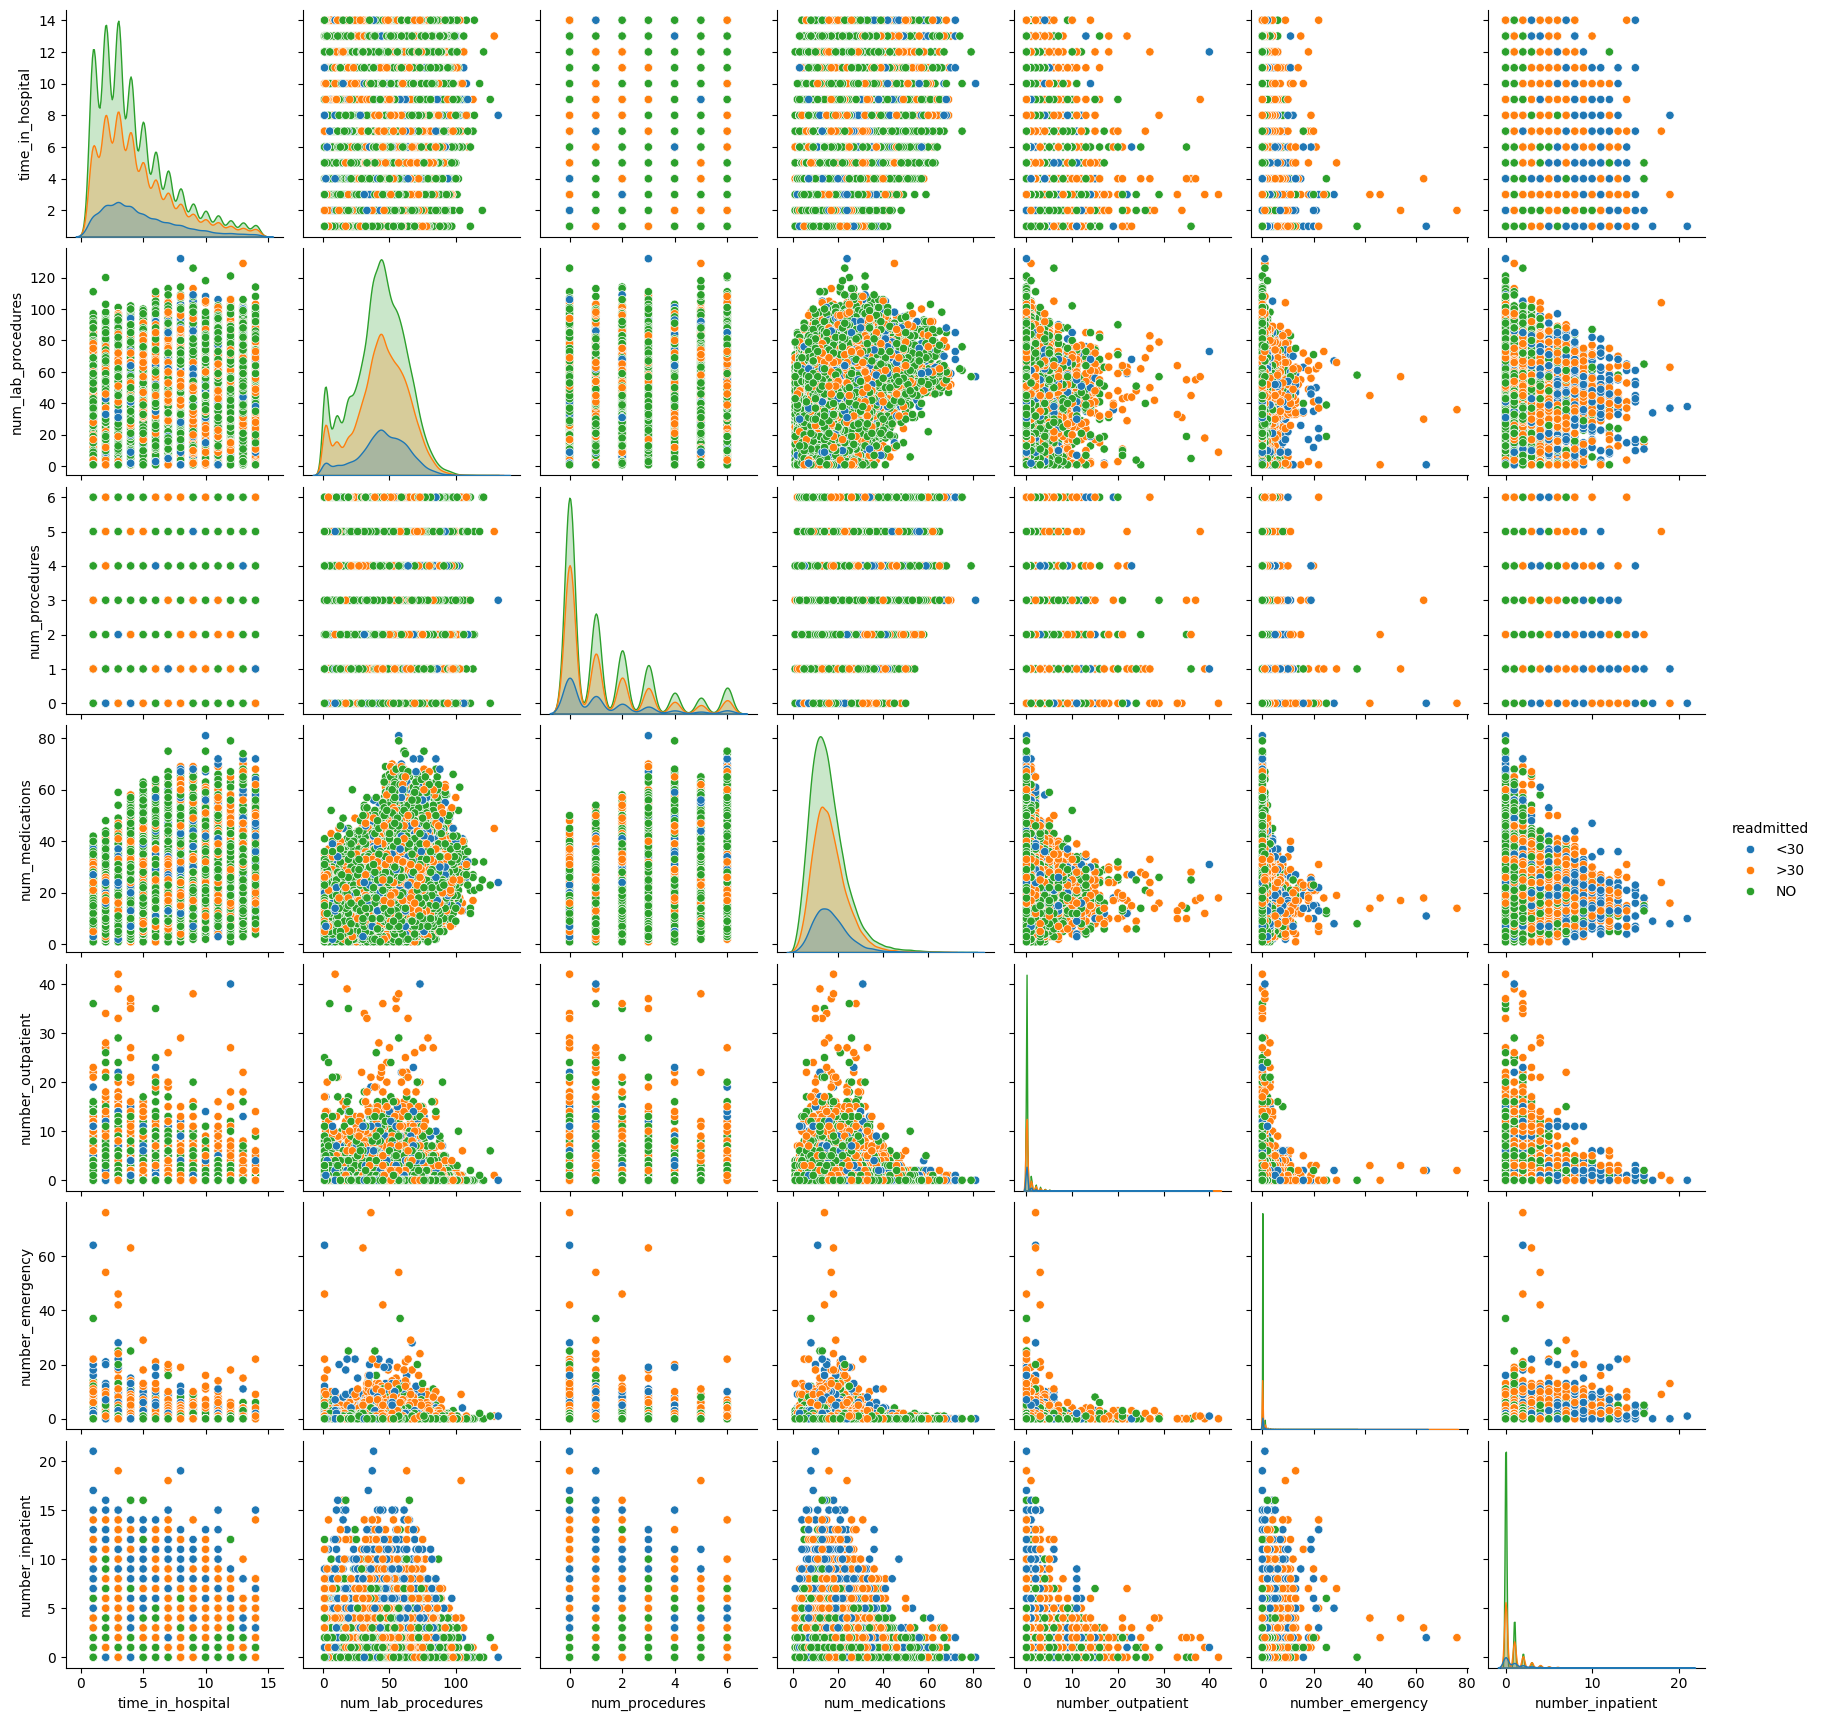

In [14]:
# Pairplot for Numerical Variables
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
sns.pairplot(df[numerical_cols + ['readmitted']], hue='readmitted')
plt.show()

#### 3.2.3 Heatmap
*changed readmittance to numerical value in num_readmittance where <30 & >30 = 1 and NO = 0*

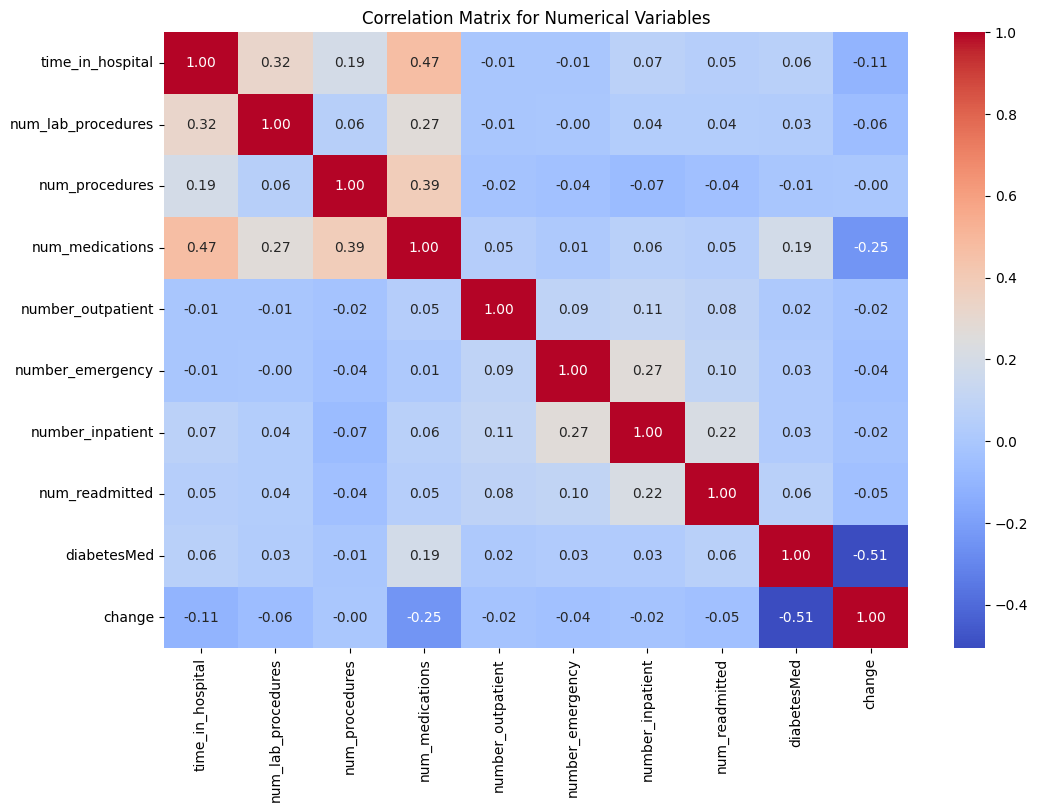

In [ ]:
# Heatmap to understand correlation between numerical variables and readmission

# Make readimitted a numerical variable
df['num_readmitted'] = df['readmitted'].map({'<30': 1, '>30': 1, 'NO': 0})

# Create Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'num_readmitted', 'diabetesMed', 'change']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

### 3.3 Relationship between Categorical Variables and Numerical Variables in the context of Readmission

<Axes: xlabel='gender', ylabel='num_medications'>

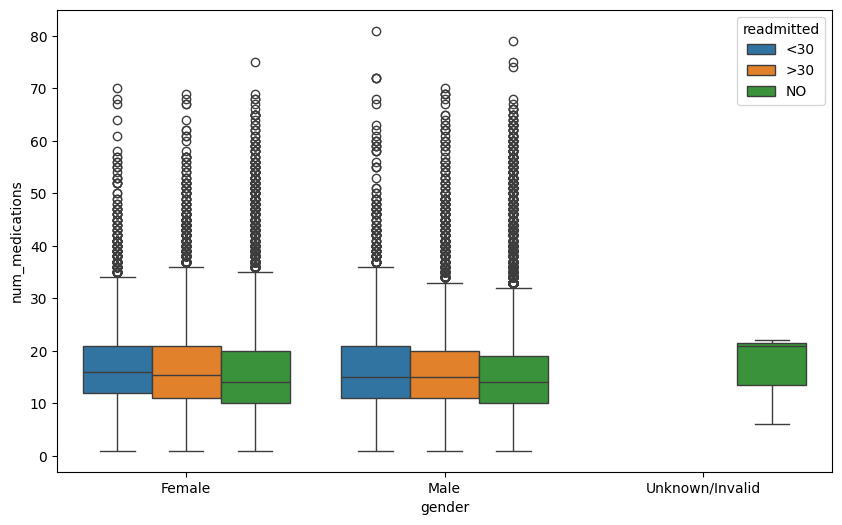

In [22]:
# Create boxplot between gender and number_medication
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='num_medications', hue='readmitted')


## STEP 4: Applying Models

In [79]:
#Import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report


In [30]:
#Preparing X and Y values
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Encode the target variable to binary
y = y.map({'NO': 0, '<30': 1, '>30': 1})

# Create a variables
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
categorical_cols = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1_category', 'diag_2_category', 'diag_3_category', 'diabetesMed', 'change']

# Ensure numeric columns are converted to numeric values and handle missing values
for col in numeric_cols:
    X[col] = X[col].astype(float)
    median_value = X[col].median()
    X[col] = X[col].fillna(median_value)

# Ensure categorical columns are converted to strings and handle missing values
for col in categorical_cols:
    X[col] = X[col].astype(str)
    mode_value = X[col].mode()[0]
    X[col].fillna(mode_value)

# Create Column Transformer with 3 types of transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = preprocessor.fit_transform(X)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((81412, 123), (20354, 123), (81412,), (20354,))

In [32]:
# Define the models
models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', class_weight='balanced'),
       # 'SVC': SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
        'DecisionTree': DecisionTreeClassifier(max_depth=5, min_samples_split=2, class_weight='balanced'),
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced'),
        'ExtraTrees': ExtraTreesClassifier(n_estimators=100, max_depth=10, class_weight='balanced'),
        'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=0.1),
        'GradientBoost': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
        'LightGBM': LGBMClassifier(n_estimators=100, boosting_type='gbdt')
    }
# Train and evaluate the models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred_prob),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
        }
    return results

results = evaluate_models(models, X_train, y_train, X_test, y_test)

In [39]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
results_df

,accuracy,precision,recall,f1_score,roc_auc,confusion_matrix
LogisticRegression,0.633291,0.607238,0.583599,0.595184,0.682555,"[[7403, 3549], [3915, 5487]]"
DecisionTree,0.626167,0.609289,0.531589,0.567793,0.654359,"[[7747, 3205], [4404, 4998]]"
RandomForest,0.637614,0.613616,0.581897,0.597336,0.690168,"[[7507, 3445], [3931, 5471]]"
ExtraTrees,0.598064,0.551715,0.692725,0.614231,0.660672,"[[5660, 5292], [2889, 6513]]"
AdaBoost,0.62543,0.635353,0.443842,0.522605,0.669839,"[[8557, 2395], [5229, 4173]]"
GradientBoost,0.633635,0.637262,0.480217,0.547704,0.690576,"[[8382, 2570], [4887, 4515]]"
XGBoost,0.642576,0.631605,0.542863,0.583881,0.695086,"[[7975, 2977], [4298, 5104]]"
LightGBM,0.645966,0.638427,0.538609,0.584285,0.698185,"[[8084, 2868], [4338, 5064]]"


In [53]:
# Find the top 3 models based on ROC AUC score
top_models = results_df.sort_values('roc_auc', ascending=False).head(3) 
top_models

,accuracy,precision,recall,f1_score,roc_auc,confusion_matrix
LightGBM,0.645966,0.638427,0.538609,0.584285,0.698185,"[[8084, 2868], [4338, 5064]]"
XGBoost,0.642576,0.631605,0.542863,0.583881,0.695086,"[[7975, 2977], [4298, 5104]]"
GradientBoost,0.633635,0.637262,0.480217,0.547704,0.690576,"[[8382, 2570], [4887, 4515]]"


In [ ]:
# Voting and Stacking top 3 models
# Extract the model names and classifiers for the top 3 models
top_model_names = top_models.index
top_classifiers = [(name, models[name]) for name in top_model_names]

# Create Voting Classifier
voting_classifier = VotingClassifier(estimators=top_classifiers, voting='soft')

# Create Stacking Classifier
stacking_classifier = StackingClassifier(estimators=top_classifiers, final_estimator=LogisticRegression())

# Create new models dictionary with Voting and Stacking classifiers
models = {
    **models,
    'Voting': voting_classifier,
    'Stacking': stacking_classifier
}

# Evaluate the Voting and Stacking Classifiers
voting_stacking_results = evaluate_models(models, X_train, y_train, X_test, y_test)

In [89]:

# Convert results to DataFrame and display the results and the top 3 models sorted by ROC AUC score
voting_stacking_results_df = pd.DataFrame(voting_stacking_results).T
voting_stacking_results_df


,accuracy,precision,recall,f1_score,roc_auc,confusion_matrix
LogisticRegression,0.633291,0.607238,0.583599,0.595184,0.682555,"[[7403, 3549], [3915, 5487]]"
DecisionTree,0.626167,0.609289,0.531589,0.567793,0.654359,"[[7747, 3205], [4404, 4998]]"
RandomForest,0.637369,0.61735,0.565412,0.59024,0.690156,"[[7657, 3295], [4086, 5316]]"
ExtraTrees,0.601061,0.554618,0.6923,0.615858,0.661941,"[[5725, 5227], [2893, 6509]]"
AdaBoost,0.62543,0.635353,0.443842,0.522605,0.669839,"[[8557, 2395], [5229, 4173]]"
GradientBoost,0.633635,0.637262,0.480217,0.547704,0.690579,"[[8382, 2570], [4887, 4515]]"
XGBoost,0.642576,0.631605,0.542863,0.583881,0.695086,"[[7975, 2977], [4298, 5104]]"
LightGBM,0.645966,0.638427,0.538609,0.584285,0.698185,"[[8084, 2868], [4338, 5064]]"
Voting,0.643608,0.640908,0.51957,0.573896,0.698835,"[[8215, 2737], [4517, 4885]]"
Stacking,0.646409,0.638349,0.541055,0.585689,0.699394,"[[8070, 2882], [4315, 5087]]"


In [88]:

# Find the top 3 models based on ROC AUC score
top_voting_stacking_models = voting_stacking_results_df.sort_values('roc_auc', ascending=False).head(3)
top_voting_stacking_models

,accuracy,precision,recall,f1_score,roc_auc,confusion_matrix
Stacking,0.646409,0.638349,0.541055,0.585689,0.699394,"[[8070, 2882], [4315, 5087]]"
Voting,0.643608,0.640908,0.51957,0.573896,0.698835,"[[8215, 2737], [4517, 4885]]"
LightGBM,0.645966,0.638427,0.538609,0.584285,0.698185,"[[8084, 2868], [4338, 5064]]"


__Hyperparameter tuning for top 3 models__

In [ ]:
## Import libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from voting import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

*Voting*

In [90]:
# Define hyperparameters for Voting Classifier
voting_params = {
    'voting': ['soft'],
    'weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2], [2, 2, 1], [2, 1, 2], [1, 2, 2]],
    'flatten_transform': [True, False]
}

# Initialize the Voting Classifier
voting_classifier = VotingClassifier(estimators=top_classifiers)

#Initialize GridSearchCV for Voting Classifier
voting_grid = GridSearchCV(estimator=voting_classifier, param_grid=voting_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

In [ ]:
# Fit the Voting Classifier
voting_grid.fit(X_train, y_train)

In [92]:
# Best parameters
best_voting_params = voting_grid.best_params_
best_voting_params

{'flatten_transform': True, 'voting': 'soft', 'weights': [2, 1, 1]}

In [93]:
#Best voting score
best_voting_score = voting_grid.best_score_

best_voting_score

np.float64(0.6988491758350904)

In [ ]:
# Best Voting Classifier from GridSearchCV
best_voting_params = {'flatten_transform': True, 'voting': 'soft', 'weights': [1, 2, 1]}

# Initialize the best Voting Classifier
best_voting_classifier = VotingClassifier(estimators=top_classifiers, **best_voting_params)

# Train and evaluate the best Voting Classifier
best_voting_classifier.fit(X_train, y_train)

# Predict the target variable
y_pred_voting_classifier = best_voting_classifier.predict(X_test)
y_pred_prob_voting_classifier = best_voting_classifier.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69     10952
           1       0.64      0.53      0.58      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354

AUC-ROC Score: 0.6987
Confusion Matrix:
[[7172 3780]
 [3506 5896]]


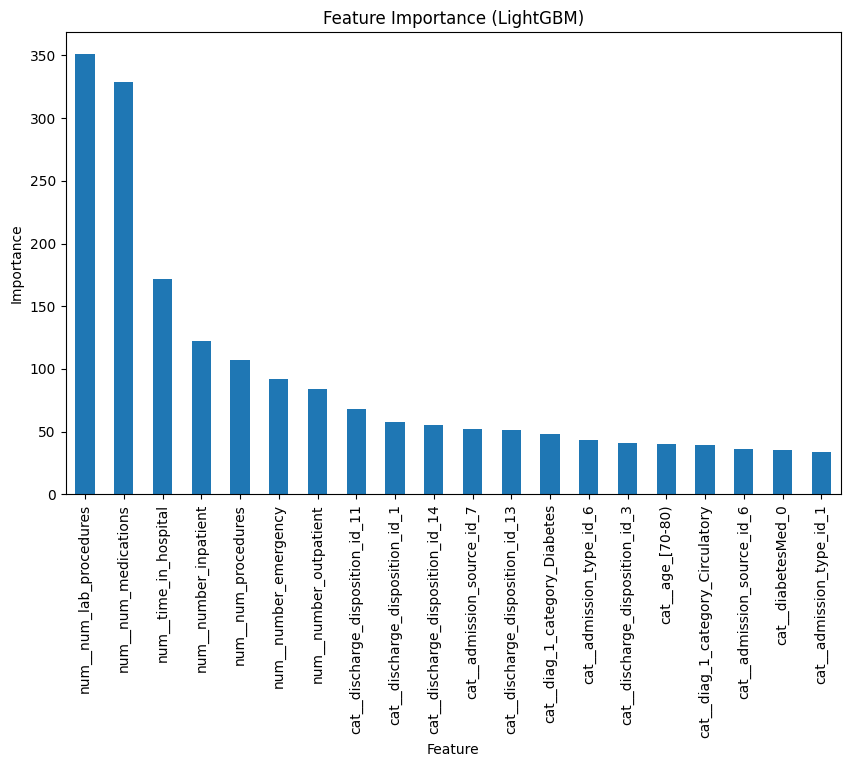

In [118]:
# Evaluation Metrics for the best Voting Classifier
print("Classification Report:")
print(classification_report(y_test, y_pred_voting_classifier))

roc_auc_voting = roc_auc_score(y_test, y_pred_prob_voting_classifier)
print(f"AUC-ROC Score: {roc_auc_voting:.4f}")

conf_matrix_voting = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(conf_matrix_voting)

# Feature Importance
feature_importance_voting = pd.Series(best_voting_classifier.estimators_[0].feature_importances_, index=preprocessor.get_feature_names_out())
feature_importance_voting.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_voting.head(20).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Voting Classifier)')
plt.show()

*Stacking Classifier   * 

In [ ]:
# Define hyperparameters for Stacking Classifier
stacking_params = {
    'final_estimator': [LogisticRegression()],
    'stack_method': ['auto', 'predict_proba'],
    'passthrough': [True, False]
}

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=top_classifiers)

# Initialize GridSearchCV for Stacking Classifier
stacking_grid = GridSearchCV(estimator=stacking_classifier, param_grid=stacking_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the Stacking Classifier
stacking_grid.fit(X_train, y_train)

In [120]:
#Best parameters
best_stacking_params = stacking_grid.best_params_
best_stacking_params

{'final_estimator': LogisticRegression(),
 'passthrough': False,
 'stack_method': 'predict_proba'}

In [ ]:
#Using Best parameters to build the model
best_stacking_classifier = StackingClassifier(estimators=top_classifiers, **best_stacking_params)

# Train and evaluate the best Stacking Classifier
best_stacking_classifier.fit(X_train, y_train)

# Predict the target variable
y_pred_stacking_classifier = best_stacking_classifier.predict(X_test)
y_pred_prob_stacking_classifier = best_stacking_classifier.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.74      0.69     10952
           1       0.64      0.54      0.59      9402

    accuracy                           0.65     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.65      0.65      0.64     20354

AUC-ROC Score: 0.6994
Confusion Matrix:
[[8072 2880]
 [4317 5085]]


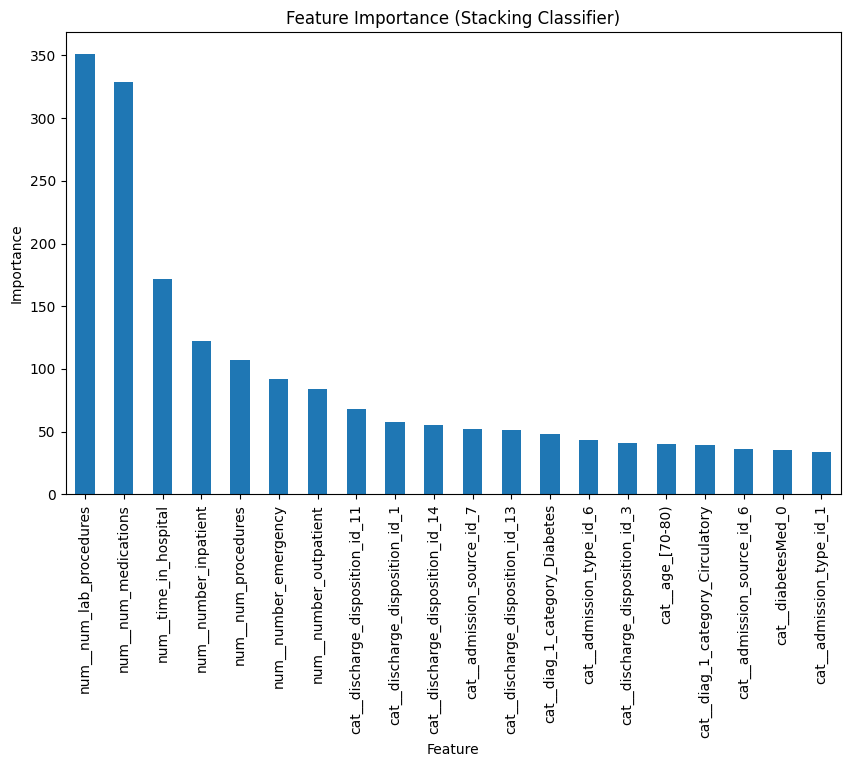

In [124]:
# Evaluation Metrics for the best Stacking Classifier
print("Classification Report:")
print(classification_report(y_test, y_pred_stacking_classifier))

roc_auc_stacking = roc_auc_score(y_test, y_pred_prob_stacking_classifier)

print(f"AUC-ROC Score: {roc_auc_stacking:.4f}")

conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking_classifier)
print("Confusion Matrix:")
print(conf_matrix_stacking)

# Feature Importance
feature_importance_stacking = pd.Series(best_stacking_classifier.estimators_[0].feature_importances_, index=preprocessor.get_feature_names_out())
feature_importance_stacking.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_stacking.head(20).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Stacking Classifier)')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69     10952
           1       0.64      0.53      0.58      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354

AUC-ROC Score: 0.6987
Confusion Matrix:
[[7172 3780]
 [3506 5896]]


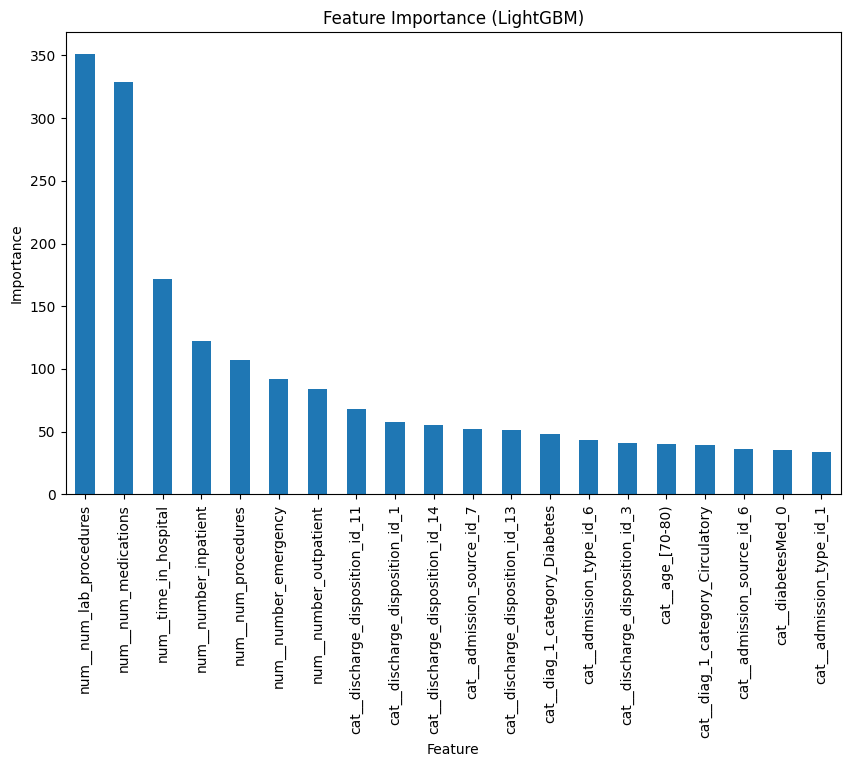

In [ ]:
# Evaluation Metrics for the best Voting Classifier
print("Classification Report:")
print(classification_report(y_test, y_pred_voting_classifier))

roc_auc_voting = roc_auc_score(y_test, y_pred_prob_voting_classifier)
print(f"AUC-ROC Score: {roc_auc_voting:.4f}")

conf_matrix_voting = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(conf_matrix_voting)

# Feature Importance
feature_importance_voting = pd.Series(best_voting_classifier.estimators_[0].feature_importances_, index=preprocessor.get_feature_names_out())
feature_importance_voting.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_voting.head(20).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (LightGBM)')
plt.show()

*LightGBM*

In [ ]:
# Define parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'boosting_type': ['gbdt', 'dart'],
    'learning_rate': [0.1, 0.01, 0.001],
    'num_leaves': [31, 62, 100],
    'class_weight': ['balanced']
}

#Initialize the model
lgbm = LGBMClassifier()

# Initialize GridSearchCV
lgbm_grid_search = GridSearchCV(estimator=lgbm, param_grid=lgbm_param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the model
lgbm_grid_search.fit(X_train, y_train)

# Test the model
y_pred = lgbm_grid_search.predict(X_test)
y_pred_prob = lgbm_grid_search.predict_proba(X_test)[:, 1]

In [59]:
# Display the best parameters
lgbm_best = lgbm_grid_search.best_params_
print(f'Best Parameters: {lgbm_best}')

Best Parameters: {'boosting_type': 'dart', 'class_weight': 'balanced', 'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 31}


In [61]:
# Display the best score
lgbm_score = lgbm_grid_search.best_score_
print(f'Best Score: {lgbm_score}')

Best Score: 0.6956698435280702


In [125]:
# Best parameters from GridSearchCV
best_params = {'boosting_type': 'dart', 'class_weight': 'balanced', 'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 31}

# Initialize the model with best parameters
lgbm_best_model = LGBMClassifier(**best_params)

# Train the model on the training data
lgbm_best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best = lgbm_best_model.predict(X_test)
y_pred_prob_best = lgbm_best_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 37500, number of negative: 43912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 81412, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     10952
           1       0.61      0.63      0.62      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354

AUC-ROC Score: 0.6980
Confusion Matrix:
[[7172 3780]
 [3506 5896]]


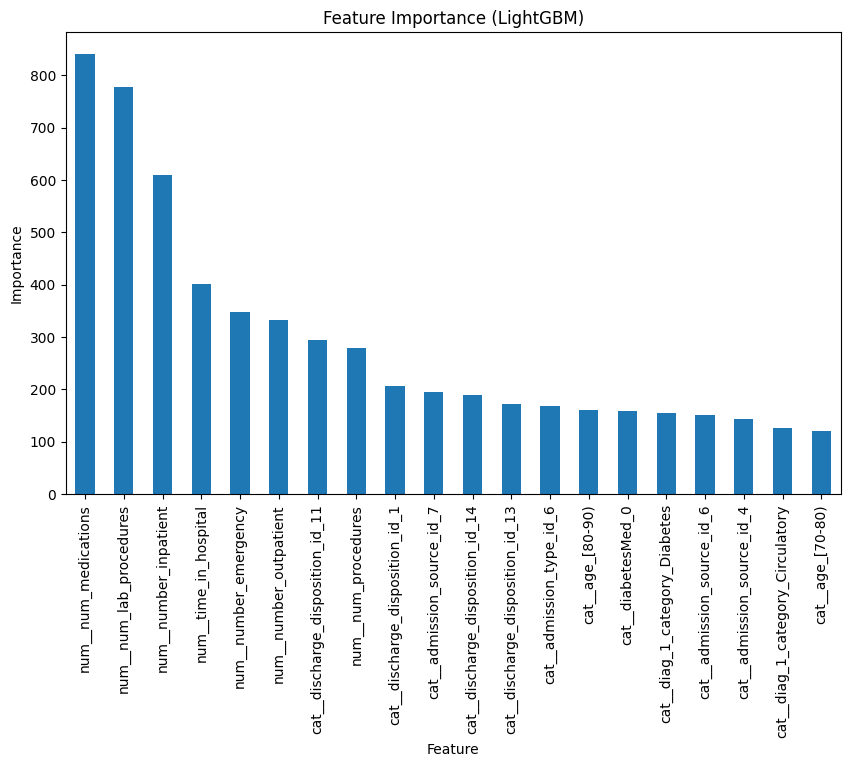

In [103]:
# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

roc_auc_lgbm = roc_auc_score(y_test, y_pred_prob_best)
print(f"AUC-ROC Score: {roc_auc_lgbm:.4f}")

conf_matrix_lgbm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(conf_matrix_lgbm)

# Feature Importance
feature_importance_lgbm = pd.Series(lgbm_best_model.feature_importances_, index=preprocessor.get_feature_names_out())
feature_importance_lgbm.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_lgbm.head(20).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (LightGBM)')
plt.show()

In [ ]:
# Learning Curve
from sklearn.model_selection import learning_curve

# Create a function to plot learning curve
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    lgbm_best_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy'
)


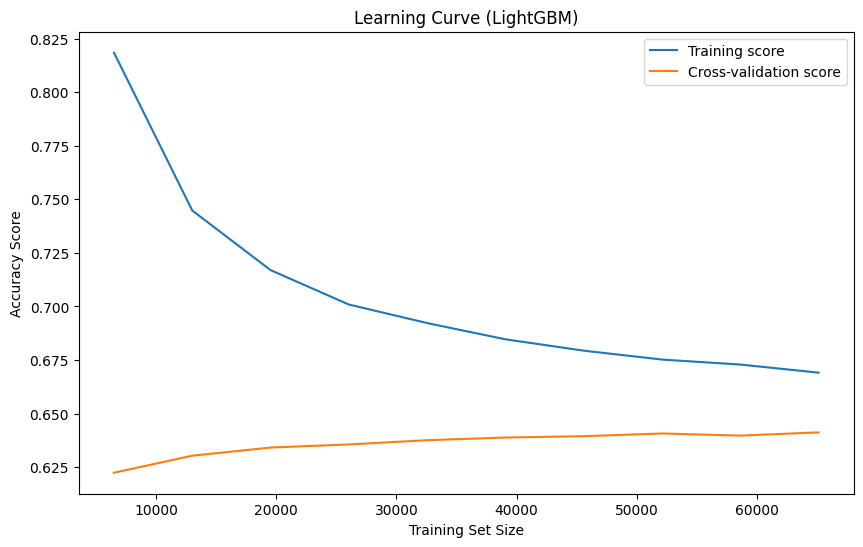

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Cross-validation score')
plt.title('Learning Curve (LightGBM)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()